# Population Optogenetic Analysis

Jupyter Notebook implementation of population optogenetic analysis. Determines if neurons were significantly activated by direct optogenetic stimulation

In [1]:
import os
from optogenetic_analysis import optogenetic_analysis, power_curve
from Lab_Analyses.Utilities.save_load_pickle import load_pickle, save_pickle
%matplotlib notebook

# Single Dataset Analysis

In [90]:
# Load some pickled data
## list of the file names to be loaded
os.chdir(r'C:\Users\Jake\Desktop\Processed_data')
fnames = ['JW049_220215_5mw', 'JW049_220215_10mw', 'JW049_220215_15mw']
## Path if data is not in the same folder. Comment out otherwise
path = r'python_data\JW049\220215\FOV3_d'
data = load_pickle(fnames,path)
i_data1 = []
b_data1 = []
for d in data1:
    i_data1.append(d['imaging'])
    b_data1.append(d['behavior'])

## Power Curve

Visualize the change in activity induced by optogenetic stimulation and the percentage of neurons significantly modulated for different stimulation powers

<IPython.core.display.Javascript object>


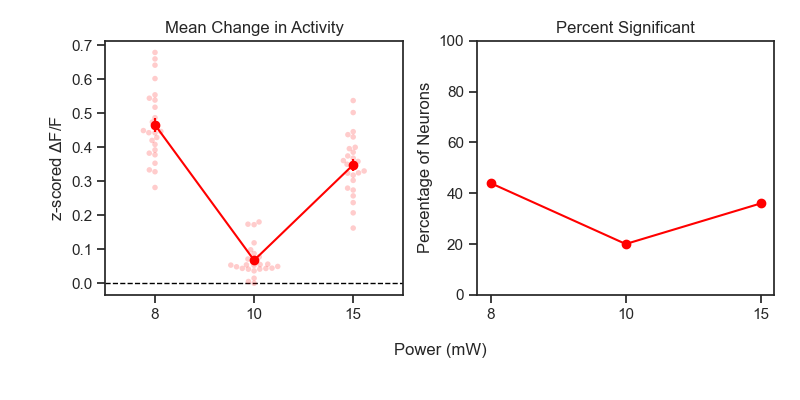

One-Way ANOVA results
F statistic:  149.6682753608866 \p-value:  2.2507782360906262e-26


bonferroni Posttest Results
╒════════════════╤═══════════╤════════════════╤═══════════════════╕
│ comparison     │    t stat │   raw p-values │   adjusted p-vals │
╞════════════════╪═══════════╪════════════════╪═══════════════════╡
│ 8 mW vs.10 mW  │  17.1754  │    3.92029e-22 │       1.17609e-21 │
├────────────────┼───────────┼────────────────┼───────────────────┤
│ 8 mW vs.15 mW  │   4.29721 │    8.40008e-05 │       0.000252002 │
├────────────────┼───────────┼────────────────┼───────────────────┤
│ 10 mW vs.15 mW │ -14.1337  │    9.92382e-19 │       2.97715e-18 │
╘════════════════╧═══════════╧════════════════╧═══════════════════╛


Summary Statistics
╒═════════════╤════════════╤═════════════╤════════════╕
│             │       8 mW │       10 mW │      15 mW │
╞═════════════╪════════════╪═════════════╪════════════╡
│ mean_diff   │  0.466506  │  0.0681778  │  0.34909   │
├─────────────┼──────────

In [91]:
# specify which method you want to use to assess if neuron was significantly activated
# 'test' uses wilcoxon signed-rank tet and 'shuff' compares against a shuffled distribution of activity
# specify if you would like to use z_scored data for not
curve = power_curve(grouped=False,data=data,powers=[8,10,15],method='test',sampling_rate=60,window=[-2,2],vis_window=None,
                        zscore=True,spines=True)


curve.generate_power_curve('bonferroni')

## Visualize Individual sessions

File Name: 
dendrite_Chrimson_bad


<IPython.core.display.Javascript object>


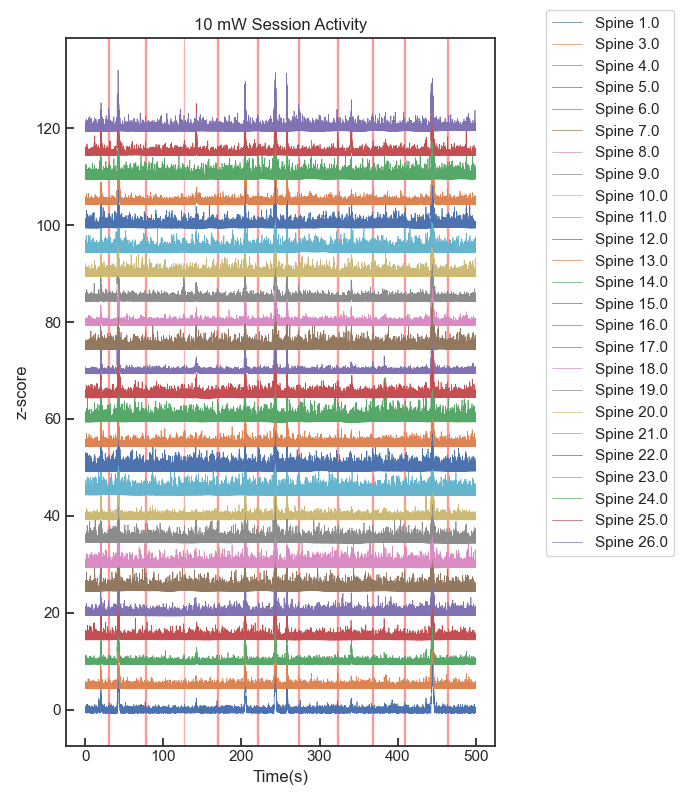

<IPython.core.display.Javascript object>


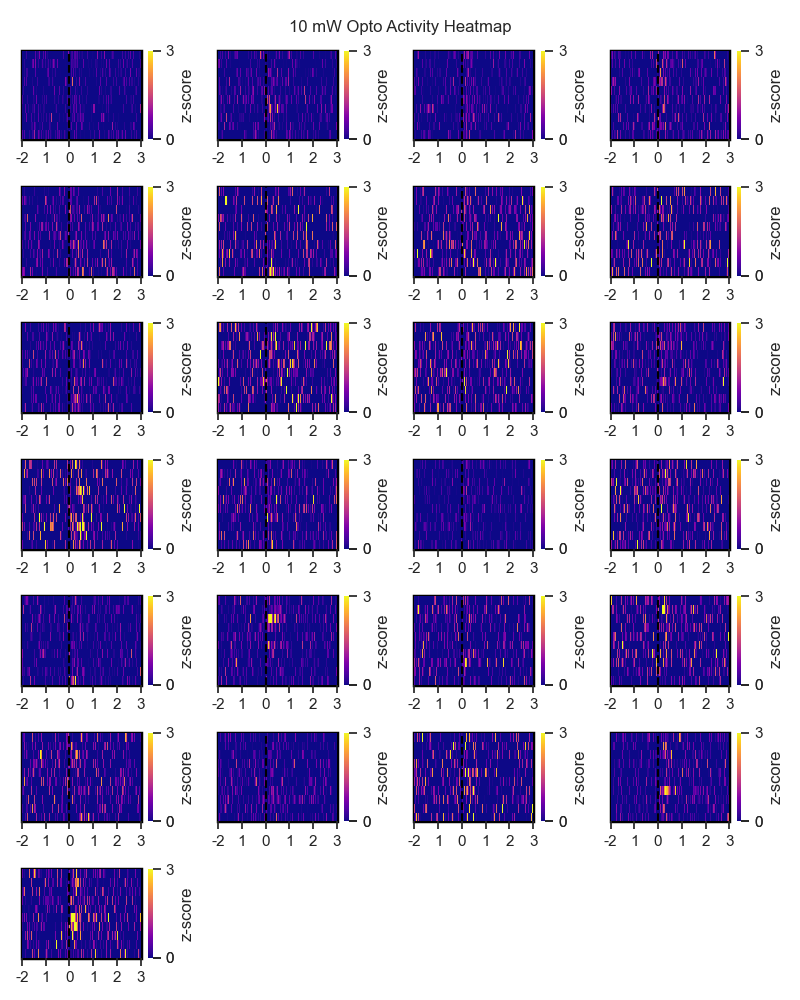

<IPython.core.display.Javascript object>


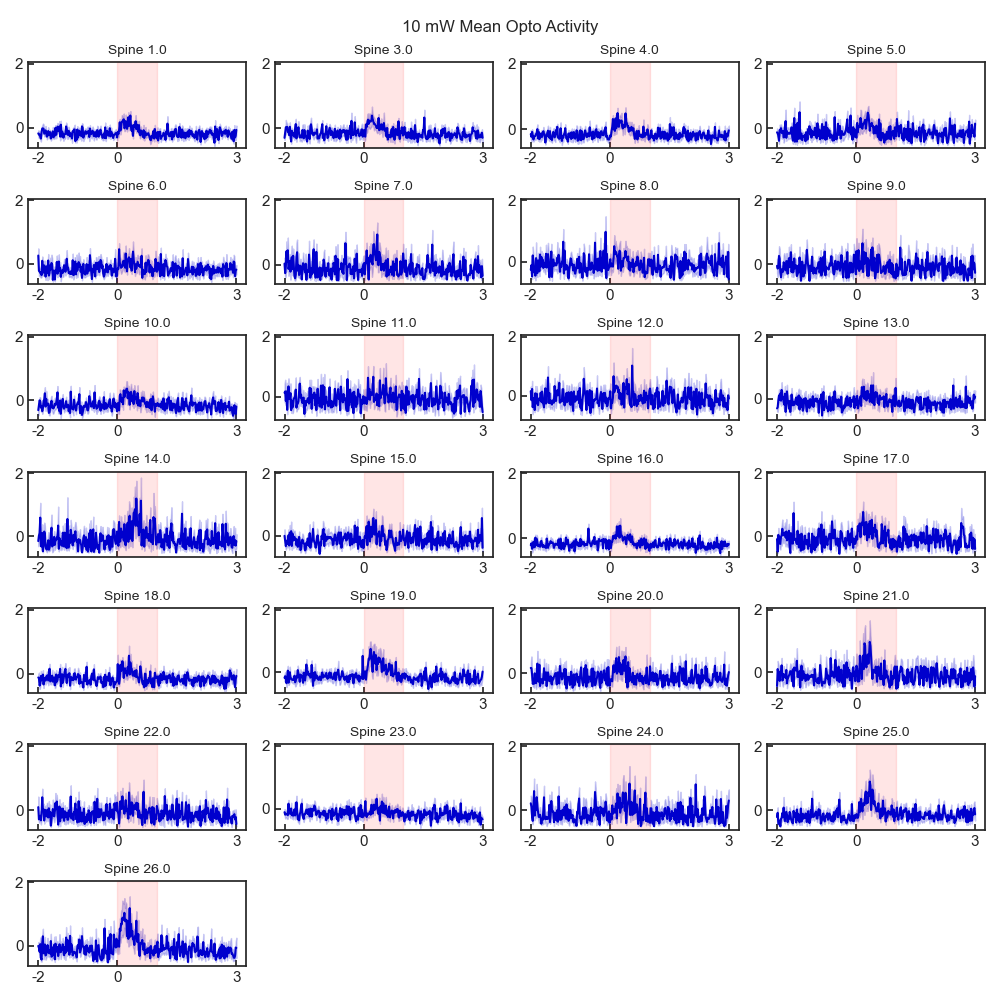

<IPython.core.display.Javascript object>


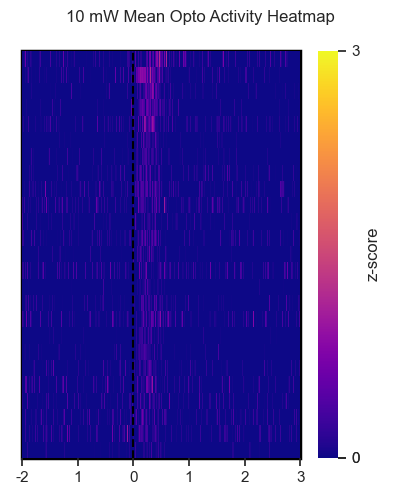

,pvalue,rank,diff,sig
Spine 1.0,0.037109,7.0,0.044254,0
Spine 3.0,0.556641,21.0,0.043995,0
Spine 4.0,0.001953,0.0,0.087810,1
Spine 5.0,0.064453,9.0,0.042141,0
Spine 6.0,0.105469,11.0,0.055596,0
Spine 7.0,0.492188,20.0,0.041903,0
Spine 8.0,0.625000,22.0,0.005771,0
Spine 9.0,0.492188,20.0,0.015334,0
Spine 10.0,0.027344,6.0,0.078192,0
Spine 11.0,0.064453,9.0,0.053428,0


In [92]:
# Specify which session you wish to visualize
curve.visualize_session(1,fig2_size=(8,10),fig3_size=(10,10),save=True,hmap_range=(0,3),zeroed=False,sort=True,cmap='plasma',center=None)

In [ ]:
itis = curve.opto_objs[0].itis
print(itis)
dFoF = curve.opto_objs[0].dFoF
import matplotlib.pyplot as plt
import numpy as np
from Lab_Analyses.Optogenetics import opto_plotting as oplot

oplot.plot_each_event(curve.opto_objs[0].roi_stim_epochs, curve.opto_objs[0].ROIs, figsize=(7,15))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dFoF['Spine 11.0'].iloc[11500:12000])
#for iti in itis:
plt.axvspan(itis[4][0], itis[4][1], alpha=0.3, color='red')

# Multi-Dataset Analysis

In [43]:
# Import multiple datasets
## Dataset 1
os.chdir(r'C:\Users\Jake\Desktop\Processed_data')
fnames = ['JW049_220215_5mw', 'JW049_220215_10mw', 'JW049_220215_15mw']
## Path if data is not in the same folder. Comment out otherwise
path = r'python_data\JW049\220215\FOV3_d'
data1 = load_pickle(fnames,path)
i_data1 = []
b_data1 = []
for d in data1:
    i_data1.append(d['imaging'])
    b_data1.append(d['behavior'])

## Dataset 2
os.chdir(r'C:\Users\Jake\Desktop\Processed_data')
fnames = ['JW049_220301_5mw', 'JW049_220301_10mw', 'JW049_220301_15mw']
## Path if data is not in the same folder. Comment out otherwise
path = r'python_data\JW049\220301\dendrite'
data2 = load_pickle(fnames,path)
i_data2 = []
b_data2 = []
for d in data2:
    i_data2.append(d['imaging'])
    b_data2.append(d['behavior'])
    
## Dataset 3
fnames = ['JW012_211113_5mw','JW012_211113_8mw','JW012_211113_10mw','JW012_211113_15mw']
## Path if data is not in the same folder. Comment out otherwise
path = r'python_data\JW012\dend_1113'
data3 = load_pickle(fnames,path)
i_data3 = []
b_data3 = []
for d in data3:
    i_data3.append(d['imaging'])
    b_data3.append(d['behavior'])
    
## Dataset 4
fnames = ['JW015_211113_5mw','JW015_211113_8mw','JW015_211113_10mw','JW015_211113_15mw']
## Path if data is not in the same folder. Comment out otherwise
path = r'python_data\JW015\dend_1113'
data4 = load_pickle(fnames,path)
i_data4 = []
b_data4 = []
for d in data4:
    i_data4.append(d['imaging'])
    b_data4.append(d['behavior'])

In [13]:
data3[1]['behavior'].Imaged_Trials

AttributeError: 'NoneType' object has no attribute 'Imaged_Trials'

## Power Curve

<IPython.core.display.Javascript object>


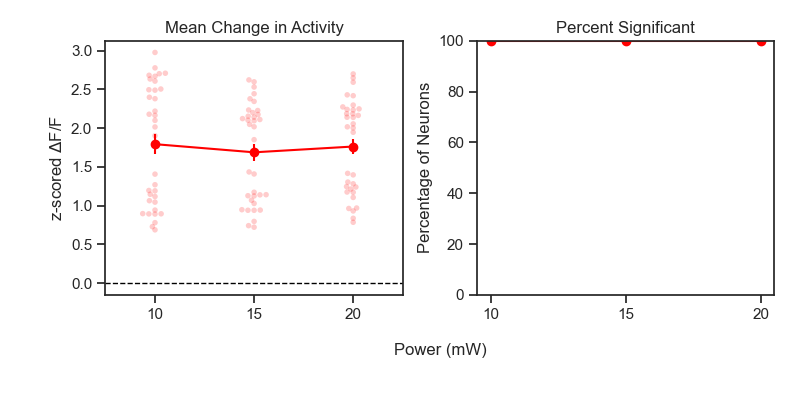

One-Way ANOVA results
F statistic:  0.2281551468621388 \p-value:  0.7964058805279104


bonferroni Posttest Results
╒════════════════╤═══════════╤════════════════╤═══════════════════╕
│ comparison     │    t stat │   raw p-values │   adjusted p-vals │
╞════════════════╪═══════════╪════════════════╪═══════════════════╡
│ 10 mW vs.15 mW │  0.623151 │       0.53527  │                 1 │
├────────────────┼───────────┼────────────────┼───────────────────┤
│ 10 mW vs.20 mW │  0.185006 │       0.853775 │                 1 │
├────────────────┼───────────┼────────────────┼───────────────────┤
│ 15 mW vs.20 mW │ -0.50959  │       0.611989 │                 1 │
╘════════════════╧═══════════╧════════════════╧═══════════════════╛


Summary Statistics
╒═════════════╤════════════╤═══════════╤════════════╕
│             │      10 mW │     15 mW │      20 mW │
╞═════════════╪════════════╪═══════════╪════════════╡
│ mean_diff   │   1.79447  │   1.68929 │   1.76406  │
├─────────────┼────────────┼────────

In [63]:
curve = power_curve(grouped=True,data=list(zip(data3,data4)),powers=[10,15,20],method='test',sampling_rate=30,window=[-2,2],vis_window=None,
                        zscore=True,spines=False)
curve.generate_power_curve('bonferroni',save=False)

## Visualize Individual Sessions

<IPython.core.display.Javascript object>


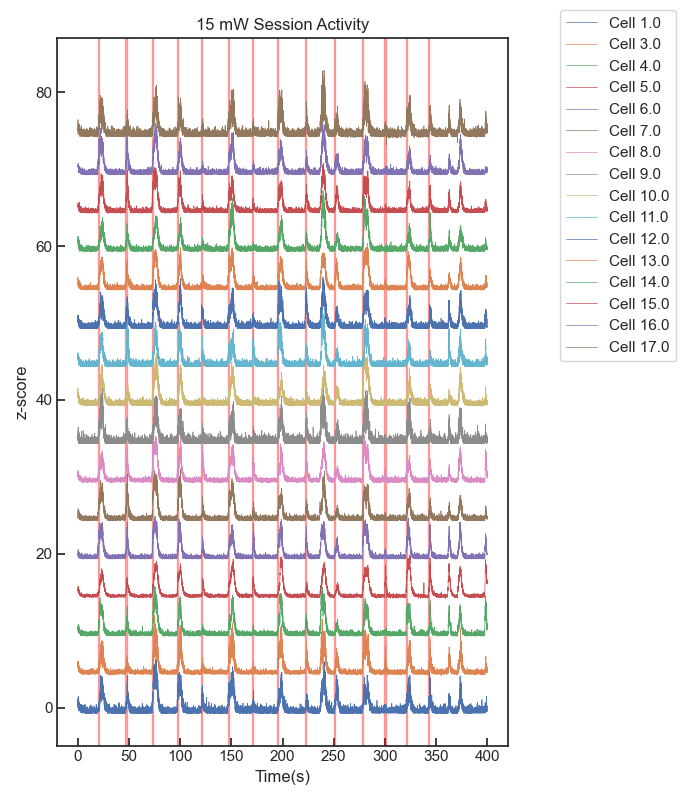

<IPython.core.display.Javascript object>


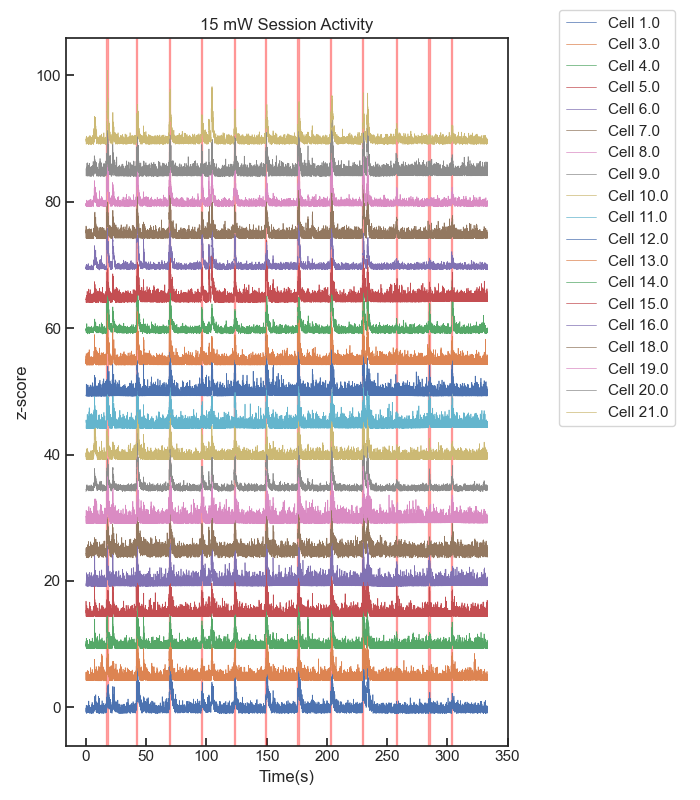

<IPython.core.display.Javascript object>


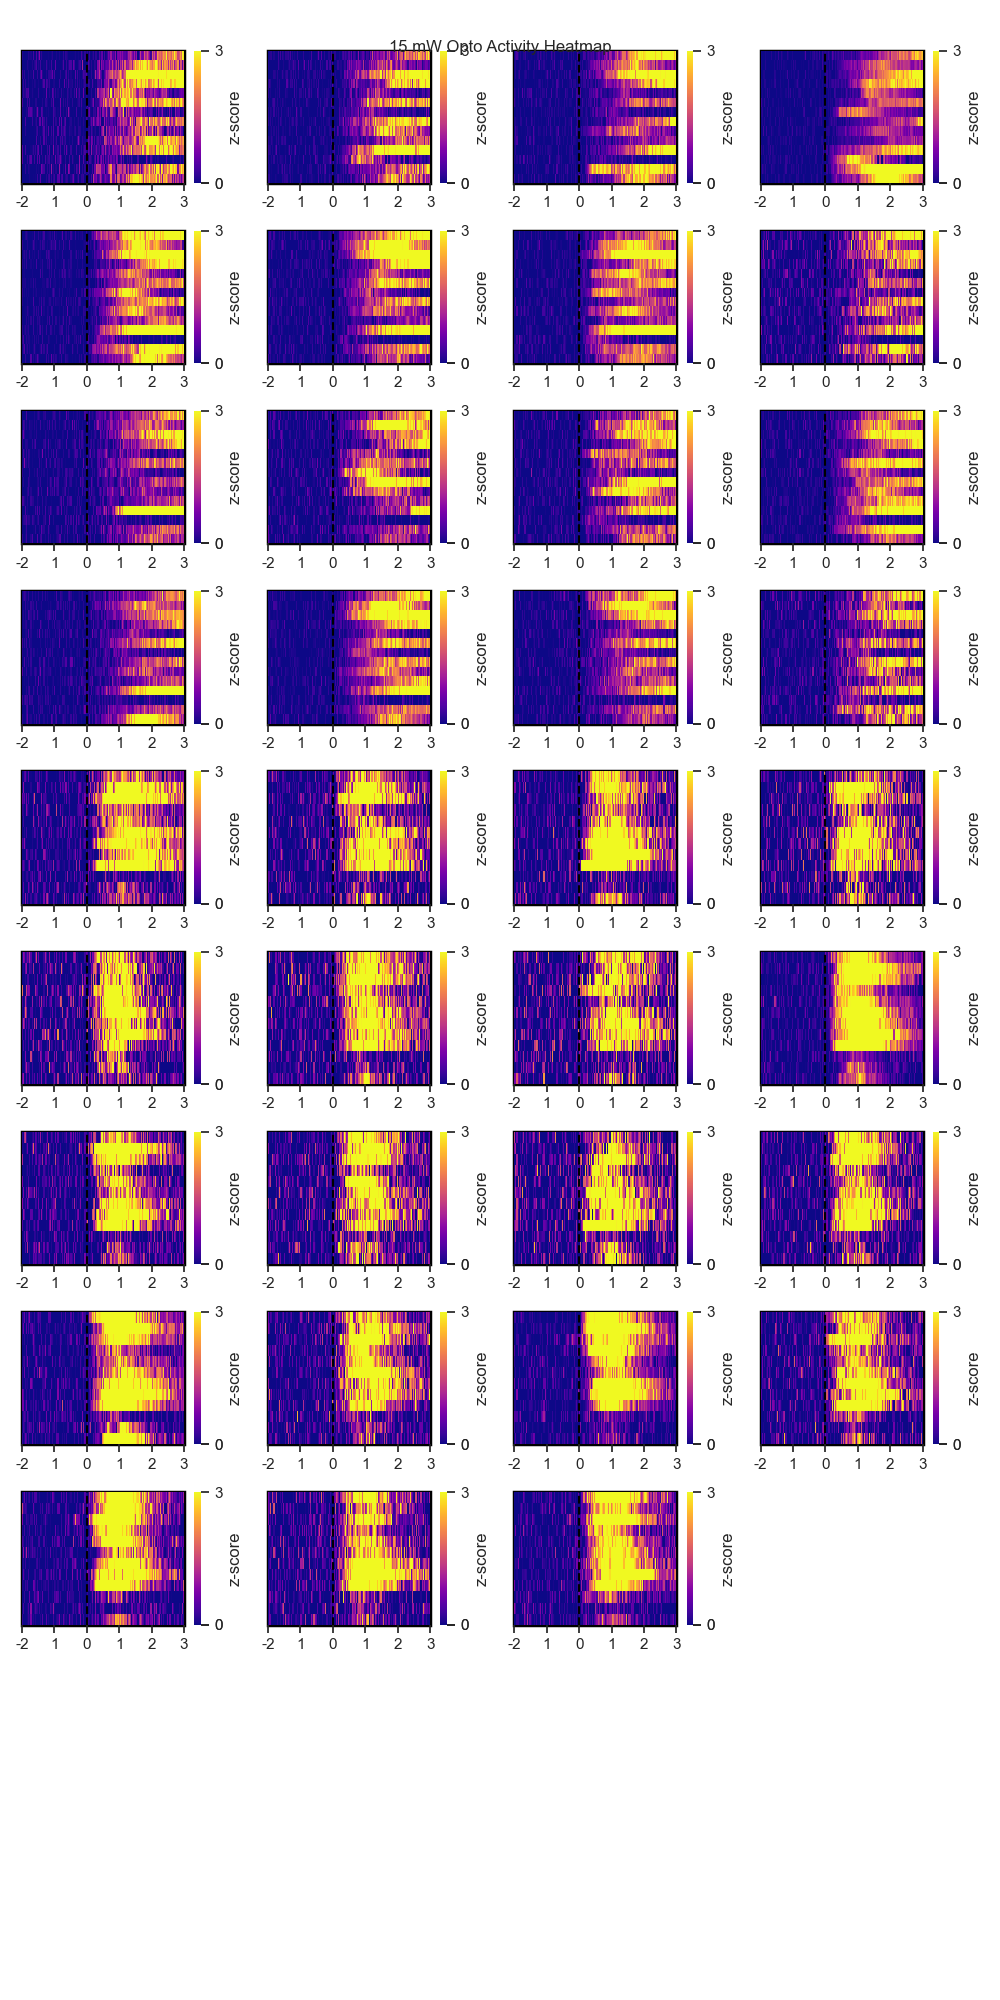

<IPython.core.display.Javascript object>


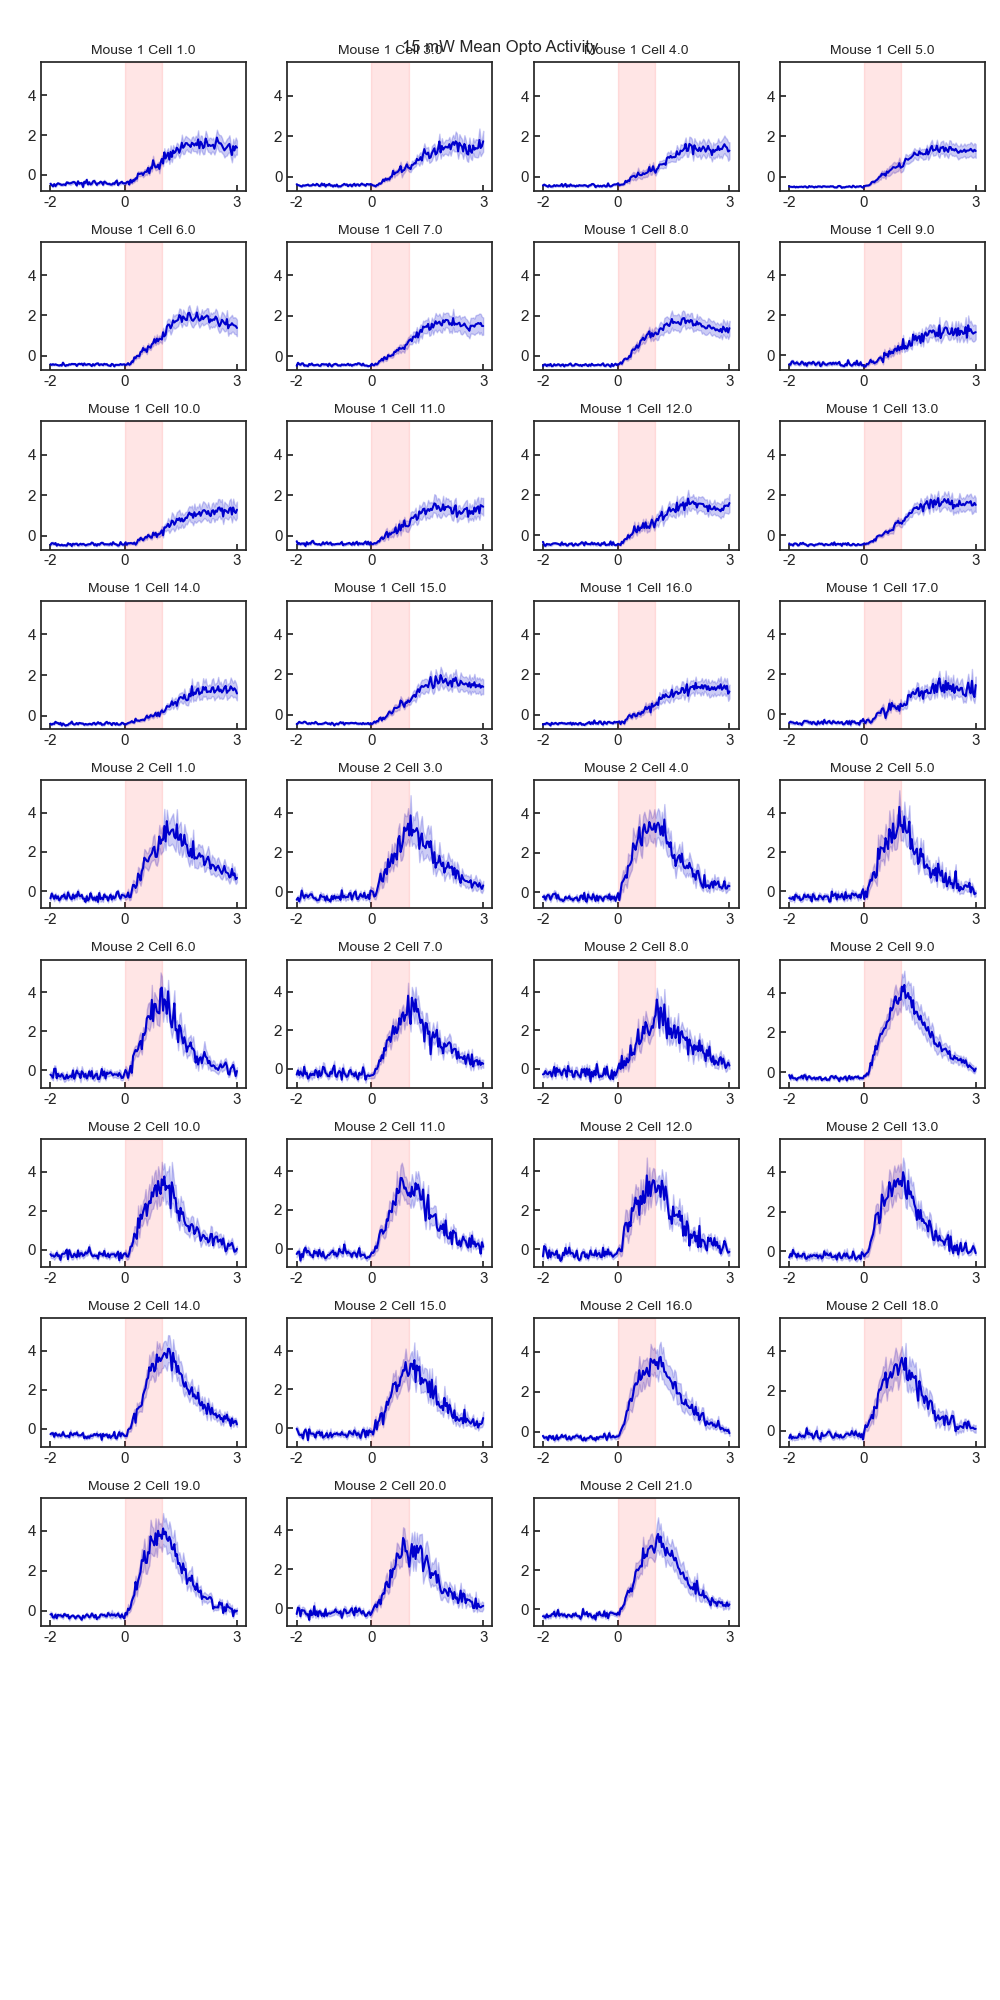

<IPython.core.display.Javascript object>


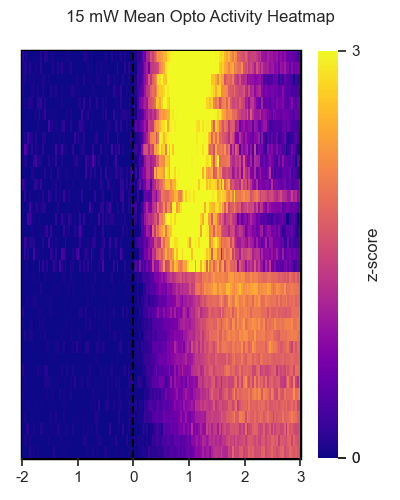

,pvalue,rank,diff,sig
Mouse 1 Cell 1.0,0.000122,0.0,1.126455,1
Mouse 1 Cell 3.0,0.000122,0.0,0.943961,1
Mouse 1 Cell 4.0,0.000122,0.0,0.941067,1
Mouse 1 Cell 5.0,0.000122,0.0,1.070797,1
Mouse 1 Cell 6.0,0.000122,0.0,1.409737,1
Mouse 1 Cell 7.0,0.000122,0.0,1.129408,1
Mouse 1 Cell 8.0,0.000122,0.0,1.435973,1
Mouse 1 Cell 9.0,0.000122,0.0,0.797833,1
Mouse 1 Cell 10.0,0.000122,0.0,0.743018,1
Mouse 1 Cell 11.0,0.000122,0.0,1.029645,1


In [64]:
curve.visualize_session(1,fig2_size=(10,20),fig3_size=(10,20),save=False,hmap_range=(0,3),zeroed=True,sort=True,cmap='plasma',center=None)

## Save Section

In [ ]:
file_name = '6_to_1_Crimson'
save_path = r'Analysis_Outputs\6_to_1_Crimson\dendrites\5_to_15mw\dFoF'
save_pickle(file_name,curve,save_path)

### Load Data

In [ ]:
os.chdir(r'C:\Users\Jake\Desktop\Processed_data')
file_name = ['6_to_1_Crimson_z']
load_path = r'Analysis_Outputs\6_to_1_Crimson\dendrites\5_to_15mw\zscore'
data = load_pickle(file_name,load_path)

#### ReExamine Data

In [ ]:
data[0].generate_power_curve('bonferroni',save=True)

In [ ]:
# data[0].visualize_session(3,fig2_size=(10,50),fig3_size=(10,30),save=True,hmap_range=(0,5))